# Classification

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Packages.data import load_csv_to_dataframe, plot_roc_curve, plot_feature_importance # show_tree,
from Packages.data import plot_learning_curves, train_test
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, mean_squared_error

### Load data from Packages.data

In [2]:
file = '../Data/data.csv'
df = load_csv_to_dataframe(file)
# print(df.columns)

### Prepare dataframe for train, validation, test split

* 'customerID': drop. A random string assigned to each customer.
* 'tenure'    : drop. A categorical feature was created for this.
* 'MonthlyCharges' : drop. A categorical feature was created for this.
* 'TotalCharges'   : drop. A categorical feature ...
* 'Churn'          : drop. The label is dropped from the X_train, X_test, X_valid datasets

The 'X' dataframe is then one hot encoded via pandas.get_dummies()

In [3]:
X = df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_cat'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Churn_cat']

### Split data into training, validation and test

The full dataset is split into three parts (training, test, validation).  

Stratified splits due to the unequal partitioning of the dataset (No: 5163 (73%), Yes: 1869 (27%))

In [4]:
#X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_valid(X, y)
X_train, X_test, y_train, y_test = train_test(X, y)

In [5]:
print(f"Dataframe: {df.shape}, X.shape: {X.shape}, y.shape: {y.shape}")
print(f"training shape: {X_train.shape},  testing shape: {X_test.shape}") # validiation shape: {X_valid.shape},
print(f"training labels: {y_train.shape},  testing labels: {y_test.shape}") # validation shape: {y_valid.shape},

Dataframe: (7032, 25), X.shape: (7032, 30), y.shape: (7032,)
training shape: (5625, 30),  testing shape: (1407, 30)
training labels: (5625,),  testing labels: (1407,)


## Black Box Models (Ensembles etc)

### DecisionTreeClassifier

The assignment is to compare a Decision Tree classifier with Random Forest

In [6]:
# From the future....
# Best params: {'max_depth': 5, 'max_features': 30, 'max_leaf_nodes': 10, 'min_samples_split': 3}
#tree_clf = DecisionTreeClassifier(max_depth=5, max_features=30, max_leaf_nodes=10, min_samples_split=3)
tree_clf = RandomForestClassifier(n_estimators=100)
tree_clf.fit(X_train, y_train)
y_predict_test = tree_clf.predict(X_test)
y_predict_train = tree_clf.predict(X_train)

In [7]:
print(tree_clf.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


## Grid Search CV : Decision Tree Classifier

Consider exploring the following parameters...

* 'criterion' : ['gini', 'entropy']
* 'max_depth' :
* 'min_samples_split' :
* 'min_samples_leaf' :
* 'max_features' :
* 'max_leaf_nodes' :
* 'min_impurity_decrease' :

In [8]:
# Grid Search CV
params = {'max_depth' : [2, 5, 10, 20],
          'min_samples_split': [3, 10, 30],
          'max_leaf_nodes': [3, 10, 30],
          'max_features': [3, 10, 30],
         'min_samples_leaf': [100, 102, 104, 106]}
# 
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5) #  verbose=1, 
grid_search_cv.fit(X_train, y_train)
best_params = grid_search_cv.best_params_

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

### Grid Search CV: best score, best parameters

In [9]:
print(f"Grid search CV, best estimator: {grid_search_cv.best_estimator_}")
print(f"Best score: {grid_search_cv.best_params_}")
print(f"Best params: {grid_search_cv.best_params_}")
print(f"Best index: {grid_search_cv.best_index_}")

Grid search CV, best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=10, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=106, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Best score: {'max_depth': 5, 'max_features': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 106, 'min_samples_split': 3}
Best params: {'max_depth': 5, 'max_features': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 106, 'min_samples_split': 3}
Best index: 165


### Grid Search CV: best parameters for Validation

In [10]:
rfc_clf_bp = RandomForestClassifier(**best_params)
rfc_clf_bp.fit(X_train, y_train)
y_predict_bp = rfc_clf_bp.predict(X_test)
y_train_predict_bp = rfc_clf_bp.predict(X_train)
bp_score = rfc_clf_bp.score(X_test, y_test)

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Cross-Validation

Cross-Validation predictions based on default DecisionTreeClassifer() (tree_clf)

In [11]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean():.4f}")
    print(f"Std: {scores.std():.4f}")

In [12]:
# Cross-Val on tree_clf : no parameters
y_predict_cv = cross_val_predict(tree_clf, X_train, y_train, cv=5)
y_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
#y_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Val predictions score: {y_predict_cv}")
display_scores(y_cv_scores)

Cross-Val predictions score: [0 0 1 ... 0 0 0]
Scores: [0.85511111 0.84622222 0.82844444 0.84088889 0.84444444]
Mean: 0.8430
Std: 0.0087


In [13]:
# Cross-Val on tree_clf_bp : best parameters
y_predict_bp_cv = cross_val_predict(rfc_clf_bp, X_train, y_train, cv=5)
y_bp_cv_scores = cross_val_score(rfc_clf_bp, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Val predictions score: {y_predict_bp_cv}")
display_scores(y_bp_cv_scores)

Cross-Val predictions score: [0 0 1 ... 0 0 0]
Scores: [0.84888889 0.85777778 0.84266667 0.848      0.84888889]
Mean: 0.8492
Std: 0.0049


## Evaluation

* For untuned model and tuned model(s)
* Accuracy ($\hat{y} - y$)
* Error (MSE, RMSE)
* Cross-Validation (n-fold scores, mean, standard deviation)
* Confustion Matrix
* Precision
* Recall

In [14]:
# Confusion Matrix results
print("Untuned, training data")
print(confusion_matrix(y_train, y_predict_train))
print("Untuned, test data")
print(confusion_matrix(y_test, y_predict_test))
print()
print("Best parameters, test data")
print(confusion_matrix(y_test, y_predict_bp))


print()
print("Untuned: Cross-Val, training data")
print(confusion_matrix(y_train, y_predict_cv))
print()
print("Best parameters: Cross-Val, training data")
print(confusion_matrix(y_train, y_predict_bp_cv))

Untuned, training data
[[4077   53]
 [  68 1427]]
Untuned, test data
[[938  95]
 [127 247]]

Best parameters, test data
[[965  68]
 [135 239]]

Untuned: Cross-Val, training data
[[3794  336]
 [ 541  954]]

Best parameters: Cross-Val, training data
[[3872  258]
 [ 559  936]]


In [15]:
# create heatmap
import seaborn as sns
def confusion_plot(y, y_pred):
    matrix = confusion_matrix(y, y_pred)
    print(matrix)
    row_names = ['True Yes', 'True No']
    col_names = ['Predict Yes', 'Predict No']
    df_confusion = pd.DataFrame(matrix, index=row_names, columns=col_names)
    print(df_confusion)
    plt.figure(figsize = (6,5))
    sns.heatmap(df_confusion, annot=True,  cmap="Blues", fmt=".0f", annot_kws={"size": 16})    
    sns.set(font_scale=1.4)#for label size  
    plt.ylim([0,2])
    plt.title("Confusion Matrix")
    #plt.ylabel("True Class")
    #plt.xlabel("Predicted Class")
    plt.savefig('./confusion_matrix.png')
    plt.show()
    plt.close()
    

[[938  95]
 [127 247]]
          Predict Yes  Predict No
True Yes          938          95
True No           127         247


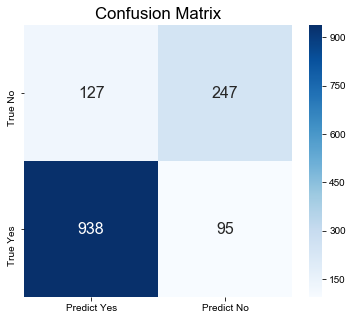

In [16]:
confusion_plot(y_test, y_predict_test)

[[965  68]
 [135 239]]
          Predict Yes  Predict No
True Yes          965          68
True No           135         239


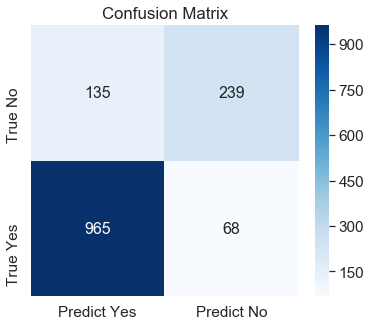

In [17]:
confusion_plot(y_test, y_predict_bp)

[[3794  336]
 [ 541  954]]
          Predict Yes  Predict No
True Yes         3794         336
True No           541         954


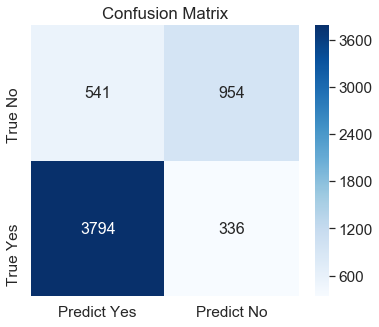

In [18]:
confusion_plot(y_train, y_predict_cv)

[[3872  258]
 [ 559  936]]
          Predict Yes  Predict No
True Yes         3872         258
True No           559         936


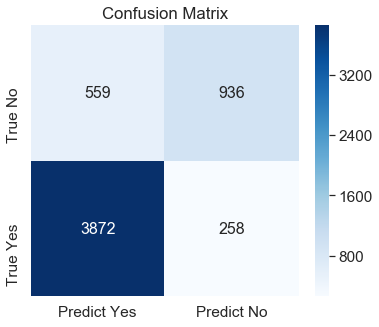

In [19]:
confusion_plot(y_train, y_predict_bp_cv)

### Classification Report

In [20]:
# Cross-Val on tree_clf_bp : best parameters
y_predict_bp_cv = cross_val_predict(rfc_clf_bp, X_train, y_train, cv=5)
y_bp_cv_scores = cross_val_score(rfc_clf_bp, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Val predictions score: {y_predict_bp_cv}")
display_scores(y_bp_cv_scores)

Cross-Val predictions score: [0 0 1 ... 0 0 1]
Scores: [0.85777778 0.84977778 0.84977778 0.85066667 0.83911111]
Mean: 0.8494
Std: 0.0060


In [21]:
print(sum(y_predict_train))
print(sum(y_predict_cv))
print(sum(y_predict_bp_cv))
################################################33
print("Accuracy for untuned")
print(f"Accuracy on training set: {tree_clf.score(X_train, y_train):.4f}")
print(f"Accuracy on test set:     {tree_clf.score(X_test, y_test):.4f}")
print(f"Accuracy on cv set:       {tree_clf.score(X_train, y_predict_cv):.4f}")

print("Accuracy for tuned")
print(f"Accuracy on training set: {rfc_clf_bp.score(X_train, y_train):.4f}")
print(f"Accuracy on test set:     {rfc_clf_bp.score(X_test, y_test):.4f}")
print(f"Accuracy on cv set:       {rfc_clf_bp.score(X_train, y_predict_bp_cv):.4f}")

######################################################
print()
# Precision, Recall and F1 Scores
print("Precision, Recall, F1 scores for 'Untuned'")
print("="*42)
print(f"Precision (test) : {precision_score(y_test, y_predict_test):.4f}")
print(f"Recall    (test) : {recall_score(y_test, y_predict_test):.4f}")
print(f"F1        (test) : {f1_score(y_test, y_predict_test):.4f}")
print('*'*8 + "Cross-Validation "+'*'*8)
print(f"Precision (train): {precision_score(y_train, y_predict_cv):.4f}")
print(f"Recall    (train): {recall_score(y_train, y_predict_cv):.4f}")
print(f"F1        (train): {f1_score(y_train, y_predict_cv):.4f}")

print("Precision, Recall, F1 scores for 'Best Parameters'")
print("="*42)
print(f"Precision (test) : {precision_score(y_test, y_predict_bp):.4f}")
print(f"Recall    (test) : {recall_score(y_test, y_predict_bp):.4f}")
print(f"F1        (test) : {f1_score(y_test, y_predict_bp):.4f}")
print('*'*8 + "Cross-Validation "+'*'*8)
print(f"Precision (train): {precision_score(y_train, y_predict_bp_cv):.4f}")
print(f"Recall    (train): {recall_score(y_train, y_predict_bp_cv):.4f}")
print(f"F1        (train): {f1_score(y_train, y_predict_bp_cv):.4f}")

1480
1290
1264
Accuracy for untuned
Accuracy on training set: 0.9785
Accuracy on test set:     0.8422
Accuracy on cv set:       0.8642
Accuracy for tuned
Accuracy on training set: 0.8585
Accuracy on test set:     0.8557
Accuracy on cv set:       0.9703

Precision, Recall, F1 scores for 'Untuned'
Precision (test) : 0.7222
Recall    (test) : 0.6604
F1        (test) : 0.6899
********Cross-Validation ********
Precision (train): 0.7395
Recall    (train): 0.6381
F1        (train): 0.6851
Precision, Recall, F1 scores for 'Best Parameters'
Precision (test) : 0.7785
Recall    (test) : 0.6390
F1        (test) : 0.7019
********Cross-Validation ********
Precision (train): 0.7682
Recall    (train): 0.6495
F1        (train): 0.7039


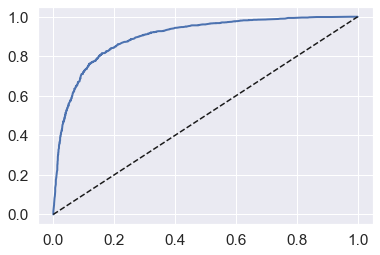

In [22]:
### ROC Curve

# Compute y scores for input to metrics
y_probas = cross_val_predict(rfc_clf_bp, X_train, y_train, cv=5, method='predict_proba')  # method='decision_function'
y_scores = y_probas[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)

In [23]:
### ROC AUC

# The Area Under Curve (AUC) returns ...

# ROC AUC Curve
print(f"ROC AUC: {roc_auc_score(y_train, y_scores):.4f}")

ROC AUC: 0.8996


In [24]:
### Comment on ROC and AUC

# * Score of 0.8831 on Area under the curve => 

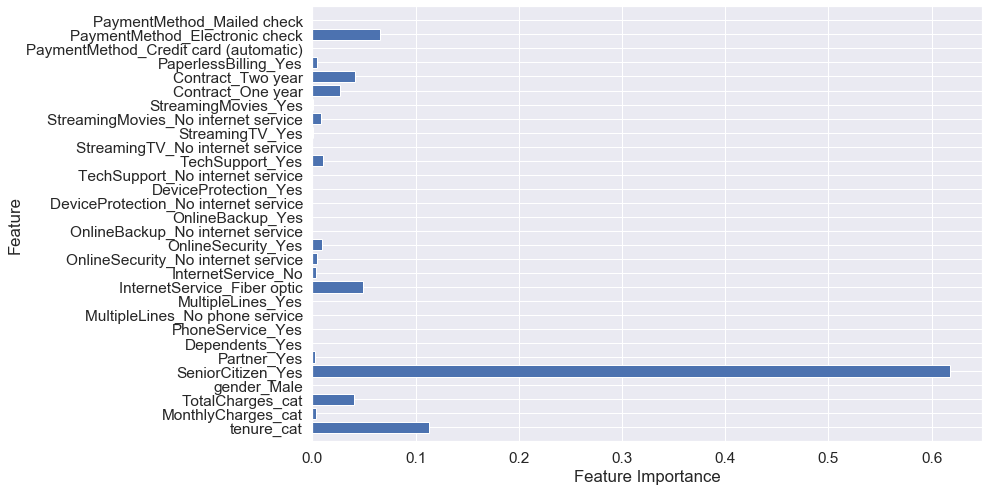

In [25]:
### Feature Importance

# print(f"Feature importances:\n{tree_clf.feature_importances_}")

plot_feature_importance(X, rfc_clf_bp)

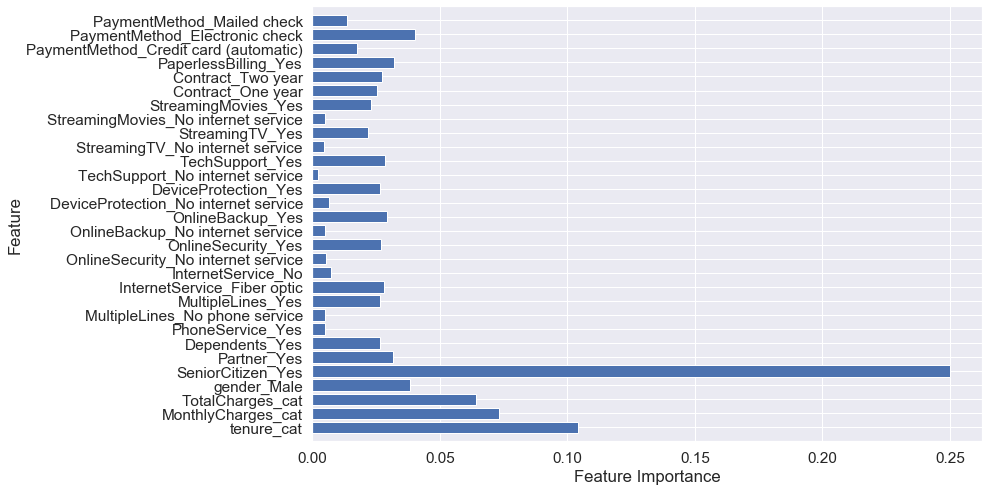

In [26]:
plot_feature_importance(X, tree_clf)

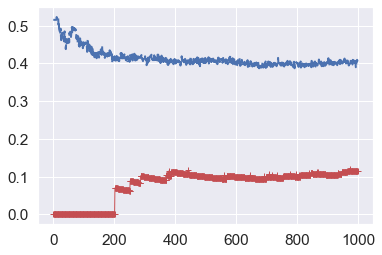

In [27]:

plot_learning_curves(tree_clf, X, y, 1000)

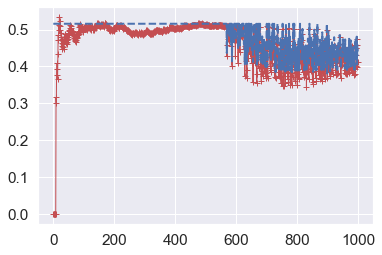

In [28]:

plot_learning_curves(rfc_clf_bp, X, y, 1000)

In [29]:
### Comparison of DT, CV and GSCV prediction scores

# print(f"Accuracy on training set: {tree_clf.score(X_train, y_train):.4f}")  # ? not fitted yet ??
print(f"Accuracy on test set: {rfc_clf_bp.score(X_test, y_test):.4f}")
#print(f"Accuracy from fit on validation set: {bp_score:.4f}")

### Classification Report Comparison: DT, CV and GSCV

print("=====================  y_test -- y_predict ============")
print("="*55)
print(classification_report(y_test, y_predict_test))
print("="*55)
print("======  y_test -- y_predict_best_parameters ==")
print("="*55)
print(classification_report(y_test, y_predict_bp))

Accuracy on test set: 0.8166
=====================  y_test -- y_predict ============
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1033
           1       0.72      0.66      0.69       374

    accuracy                           0.84      1407
   macro avg       0.80      0.78      0.79      1407
weighted avg       0.84      0.84      0.84      1407

======  y_test -- y_predict_best_parameters ==
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1033
           1       0.78      0.64      0.70       374

    accuracy                           0.86      1407
   macro avg       0.83      0.79      0.80      1407
weighted avg       0.85      0.86      0.85      1407



## Black Box Models

### Voting Classifier

In [30]:
# Create an instance of every classifier for comparison
knn_clf = KNeighborsClassifier(7)
log_clf = LogisticRegression(max_iter=1000)
lsvm_clf = SVC(kernel="linear", C=0.025)
rbfsvm_clf = SVC(gamma=2, C=1)
gaus_clf = GaussianProcessClassifier(1.0 * RBF(1.0))
rf_clf = RandomForestClassifier(**best_params)
mlpnn_clf = MLPClassifier(max_iter=1000)
ada_clf = AdaBoostClassifier()
gausb_clf = GaussianNB()
qda_clf = QuadraticDiscriminantAnalysis()

In [31]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf),
                ('log', log_clf),
                ('lsvm', lsvm_clf),
                ('gaus', gaus_clf),
                ('rf', rf_clf),
                ('ada', ada_clf),
                ],
    voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=7,
                                                   p=2, weights='uniform')),
                             ('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                            

### Bagging

In [32]:
# Bagging Decision Tree Classifier
bag_clf = BaggingClassifier(
    RandomForestClassifier(**best_params), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred_bag_dt = bag_clf.predict(X_test)

In [33]:
# Bagging Logistic Regression Classifier
bag_clf = BaggingClassifier(
    LogisticRegression(max_iter=2000), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred_bag_lr = bag_clf.predict(X_test)

### Boosting

In [34]:
# ada_clf = AdaBoostClassifier(
#     base_estimator=tree_clf, n_estimators=10,
#     algorithm="SAMME.R", learning_rate= 1)
# # Accuracy: 0.8606965

# log_ada_clf = LogisticRegression()
# adaboost_clf = AdaBoostClassifier(
#     base_estimator=log_ada_clf, n_estimators=10,
#     algorithm="SAMME.R", learning_rate= 1)
# Accuracy: 0.840085

# ada_clf = AdaBoostClassifier(
#     base_estimator=voting_clf, n_estimators=10,
#     algorithm="SAMME", learning_rate= 1)
# # Accuracy: 0.8294243070362474

# ada_clf = AdaBoostClassifier(
#     base_estimator=bag_clf, n_estimators=10,
#     algorithm="SAMME.R", learning_rate= 1)v
# # Accuracy: 0.8599857853589197

adaboost_clf = AdaBoostClassifier(
    base_estimator=rfc_clf_bp, n_estimators=10,
    algorithm="SAMME.R", learning_rate= 1)
# Accuracy: 0.8599857853589197

adaboost_clf.fit(X_train, y_train)

# Generate predictions for test dataset
y_pred_boost = adaboost_clf.predict(X_test)

### Logistic Regression Search CV

In [35]:
# l2 (ridge) penalty

best_model_task2 = LogisticRegressionCV(
    # Each of the values in Cs describes the inverse of regularization strength.
    Cs=list(np.power(10.0, np.arange(-10, 10))),
    # penalty{‘l1’, ‘l2’, ‘elasticnet’}, default=’l2’
    # The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. 
    # ‘elasticnet’ is only supported by the ‘saga’ solver.
    penalty='l2', #'l1', # 
    # The default scoring option used is ‘accuracy’.
    # For a list of scoring functions that can be used, look at sklearn.metrics
    scoring='roc_auc',# 'accuracy',#'neg_log_loss',#
    cv=5,
    random_state=777,
    max_iter=10000,
    # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    # fit_intercept : bool, default=True
    fit_intercept=True,
    # Algorithm to use in the optimization problem.
    # solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    solver='newton-cg',#'lbfgs', # 'sag',#
    # l1_ratioslist of float, default=None
    #l1_ratios = [0.5],
    # Tolerance for stopping criteria
    tol=10
    )
best_model_task2.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None, cv=5, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=10000,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=777, refit=True, scoring='roc_auc',
                     solver='newton-cg', tol=10, verbose=0)

# Scores, etc

In [36]:
print ('Max auc_roc:', best_model_task2.scores_[1].max())

print(f"Accuracy score on train data: {best_model_task2.score(X_train, y_train):.4f}")
print(f"Accuracy score on test data: {best_model_task2.score(X_test, y_test):.4f}")

Max auc_roc: 0.9142865240875557
Accuracy score on train data: 0.9075
Accuracy score on test data: 0.9053


C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [37]:
test_acc = []
for clf in (knn_clf, log_clf, lsvm_clf, gaus_clf, rf_clf, ada_clf, voting_clf): # rbfsvm_clf,gausb_clf, qda_clf,mlpnn_clf, 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_acc.append((clf.__class__.__name__, accuracy_score(y_test, y_pred)))
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
test_acc

[('KNeighborsClassifier', 0.828002842928216),
 ('LogisticRegression', 0.8599857853589197),
 ('SVC', 0.8471926083866382),
 ('GaussianProcessClassifier', 0.8592750533049041),
 ('RandomForestClassifier', 0.8564321250888415),
 ('AdaBoostClassifier', 0.8557213930348259),
 ('VotingClassifier', 0.8635394456289979)]

In [39]:
# bagging
print(classification_report(y_test, y_pred_bag_dt))

print(classification_report(y_test, y_pred_bag_lr))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1033
           1       0.80      0.60      0.69       374

    accuracy                           0.85      1407
   macro avg       0.83      0.77      0.80      1407
weighted avg       0.85      0.85      0.85      1407



C:\Users\Dunbar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
# Boosting  
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print(f"Classification Report: {classification_report(y_test, y_pred_boost)}")

Accuracy: 0.8578535891968728
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1033
           1       0.76      0.68      0.72       374

    accuracy                           0.86      1407
   macro avg       0.82      0.80      0.81      1407
weighted avg       0.85      0.86      0.86      1407

